**Creating a model that will predict whether or not users will click on an ad based off features of that user using fake advertising data set**

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 1 , 0 indicated clicking on Ad

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading Data

In [2]:
df = pd.read_csv('../DATA/advertisings.csv')
df.sample(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
705,78.84,26,56593.80,217.66,Persistent even-keeled application,Shawnside,1,Italy,2016-06-29 07:20:46,0
979,70.29,31,56974.51,254.65,Balanced responsive open system,New Frankshire,1,Norfolk Island,2016-03-30 14:36:55,0
471,67.69,37,76408.19,216.57,Monitored content-based implementation,Lake Jasonchester,0,Finland,2016-07-18 18:33:05,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,1000.0,65.00020,15.853615,32.60,51.3600,68.215,78.5475,91.43
Age,1000.0,36.00900,8.785562,19.00,29.0000,35.000,42.0000,61.00
Area Income,1000.0,55000.00008,13414.634022,13996.50,47031.8025,57012.300,65470.6350,79484.80
Daily Internet Usage,1000.0,180.00010,43.902339,104.78,138.8300,183.130,218.7925,269.96
Male,1000.0,0.48100,0.499889,0.00,0.0000,0.000,1.0000,1.00
Clicked on Ad,1000.0,0.50000,0.500250,0.00,0.0000,0.500,1.0000,1.00


In [10]:
df.duplicated().sum()

0

## Exploratory Data Analysis

<AxesSubplot:>

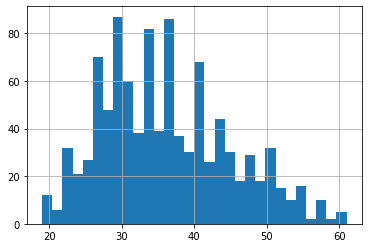

In [11]:
df.Age.hist(bins=30)

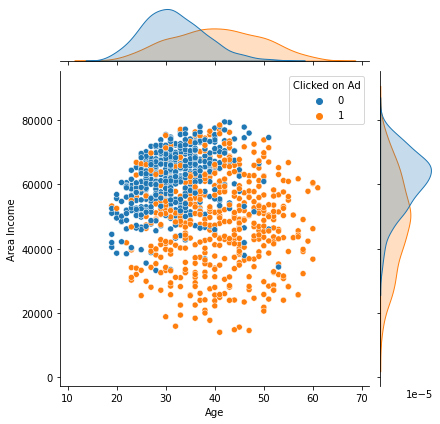

In [17]:
sns.jointplot(x=df['Age'],y=df['Area Income'],hue=df['Clicked on Ad'])

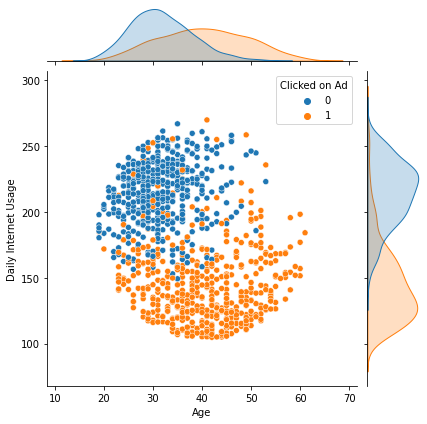

In [39]:
sns.jointplot(x=df['Age'],y=df['Daily Internet Usage'],hue=df['Clicked on Ad'])

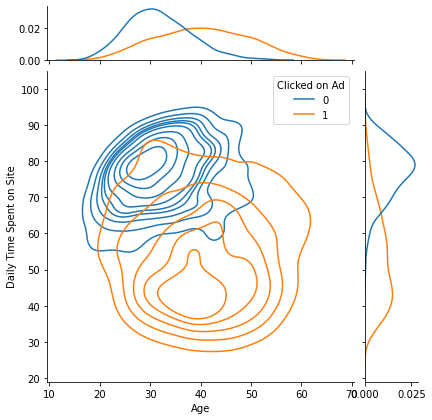

In [19]:
sns.jointplot(x=df['Age'],y=df['Daily Time Spent on Site'],hue=df['Clicked on Ad'],kind='kde',marginal_ticks=True)

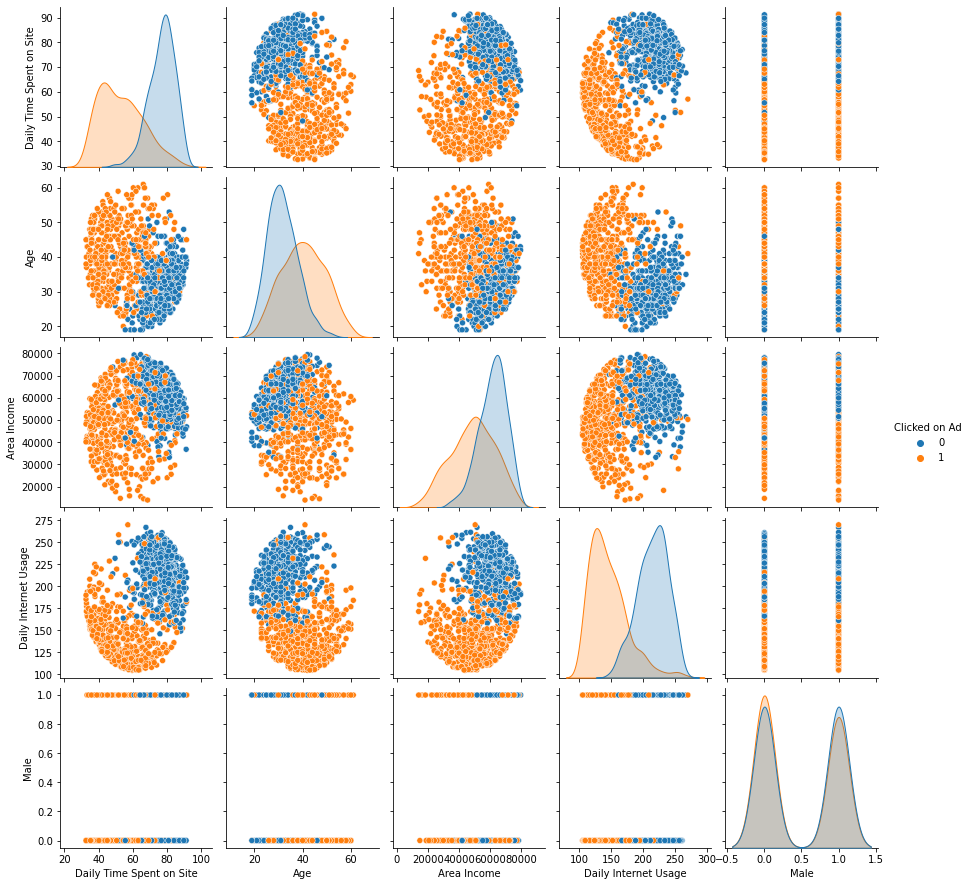

In [42]:
sns.pairplot(df,hue='Clicked on Ad')

## Spliting The Data

In [23]:
df.head(1)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.9,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0


In [30]:
df.Male.value_counts()

0    519
1    481
Name: Male, dtype: int64

In [31]:
X = df[['Daily Time Spent on Site','Age','Area Income','Male']]
y = df['Clicked on Ad']

In [33]:
X.head()

,Daily Time Spent on Site,Age,Area Income,Male
0,68.95,35,61833.90,0
1,80.23,31,68441.85,1
2,69.47,26,59785.94,0
3,74.15,29,54806.18,1
4,68.37,35,73889.99,0


In [32]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Clicked on Ad, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [43]:
X_train

,Daily Time Spent on Site,Age,Area Income,Male
541,75.65,39,64021.55,1
440,46.04,32,65499.93,0
482,69.42,25,65791.17,0
422,53.38,35,60803.37,1
778,52.67,44,14775.50,0
...,...,...,...,...
106,72.23,25,46557.92,1
270,44.49,53,63100.13,1
860,91.37,45,51920.49,1
435,56.66,42,72684.44,0


In [44]:
X_test

,Daily Time Spent on Site,Age,Area Income,Male
521,63.26,29,54787.37,1
737,71.23,52,41521.28,0
740,43.63,38,61757.12,1
660,42.04,49,67323.00,0
411,78.68,29,66225.72,0
...,...,...,...,...
468,65.59,47,28265.81,0
935,83.98,36,68305.91,0
428,60.53,29,56759.48,0
7,66.00,48,24593.33,1


In [45]:
y_test

521    1
737    1
740    1
660    1
411    0
      ..
468    1
935    0
428    1
7      1
155    0
Name: Clicked on Ad, Length: 300, dtype: int64

In [46]:
y_train

541    0
440    1
482    0
422    1
778    1
      ..
106    0
270    1
860    1
435    1
102    0
Name: Clicked on Ad, Length: 700, dtype: int64

## Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
lc = LogisticRegression()

In [50]:
lc.fit(X_train,y_train)

LogisticRegression()

In [51]:
y_pred = lc.predict(X_test)

In [52]:
lc.score(X_test,y_test)

0.8866666666666667

## Predictions and Evaluations

In [58]:
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

In [54]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89       168
           1       0.82      0.95      0.88       132

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.90      0.89      0.89       300



In [55]:
print(accuracy_score(y_pred,y_test))

0.8866666666666667


In [57]:
confusion_matrix(y_pred,y_test)

array([[140,  28],
       [  6, 126]], dtype=int64)